In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
sns.set_style("whitegrid")

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:
train = train.set_index("id")
test = test.set_index("id")

In [5]:
train["NObeyesdad"]

id
0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object

In [6]:
label_encoder = LabelEncoder()

In [7]:
train["NObeyesdad"] = label_encoder.fit_transform(train["NObeyesdad"])

In [8]:
label_encoder.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [9]:
pd.DataFrame(label_encoder.classes_, columns=["NObeyesdad"]).to_csv("data/classes.csv", index=False)

In [10]:
train["NObeyesdad"].value_counts()

NObeyesdad
4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: count, dtype: int64

In [11]:
train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [13]:
train.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [14]:
test.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [15]:
test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [16]:
train.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                          int32
dtype: object

In [17]:
min_max_scaler = MinMaxScaler()

In [18]:
for col in train.columns:
    if train[col].dtype == "float64":
        train[col] = min_max_scaler.fit_transform(train[[col]])
        test[col] = min_max_scaler.transform(test[[col]])

In [19]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,0.222192,0.475586,0.338497,yes,yes,0.500000,0.661099,Sometimes,no,0.881787,no,0.000000,0.488237,Sometimes,Public_Transportation,6
1,Female,0.085106,0.209260,0.142792,yes,yes,0.500000,0.666667,Frequently,no,0.500000,no,0.333333,0.500000,no,Automobile,1
2,Female,0.085106,0.497391,0.088577,yes,yes,0.440267,0.137228,Sometimes,no,0.455189,no,0.288682,0.836792,no,Public_Transportation,0
3,Female,0.147931,0.496002,0.732007,yes,yes,1.000000,0.666667,Sometimes,no,0.337031,no,0.489288,0.390099,Sometimes,Public_Transportation,4
4,Male,0.375342,0.883049,0.434708,yes,yes,0.839832,0.323824,Sometimes,no,0.489924,no,0.655991,0.465861,Sometimes,Public_Transportation,6


In [20]:
one_hot_encoder = OneHotEncoder()

In [21]:
for col in train.columns:
    if train[col].dtype == "object":
        if train[col].nunique() > 2:
            col_train_encoded = one_hot_encoder.fit_transform(train[[col]])
            train = train.drop(col, axis=1)
            train = pd.concat([train, pd.DataFrame(col_train_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out([col]))], axis=1)
            col_test_encoded = one_hot_encoder.fit_transform(test[[col]])
            test = test.drop(col, axis=1)
            test = pd.concat([test, pd.DataFrame(col_test_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out([col]))], axis=1)
        else:
            train[col] = label_encoder.fit_transform(train[col])
            test[col] = label_encoder.fit_transform(test[col])

In [22]:
train.head().T

,0,1,2,3,4
Gender,1.000000,0.000000,0.000000,0.000000,1.000000
Age,0.222192,0.085106,0.085106,0.147931,0.375342
Height,0.475586,0.209260,0.497391,0.496002,0.883049
Weight,0.338497,0.142792,0.088577,0.732007,0.434708
family_history_with_overweight,1.000000,1.000000,1.000000,1.000000,1.000000
FAVC,1.000000,1.000000,1.000000,1.000000,1.000000
FCVC,0.500000,0.500000,0.440267,1.000000,0.839832
NCP,0.661099,0.666667,0.137228,0.666667,0.323824
SMOKE,0.000000,0.000000,0.000000,0.000000,0.000000
CH2O,0.881787,0.500000,0.455189,0.337031,0.489924


In [23]:
print(train.shape)
train.drop_duplicates(inplace=True)
print(train.shape)

(20758, 26)
(20758, 26)


In [27]:
feature_importance = RandomForestClassifier(n_estimators=300, random_state=42).fit(train.drop("NObeyesdad", axis=1), train["NObeyesdad"]).feature_importances_

<Axes: >

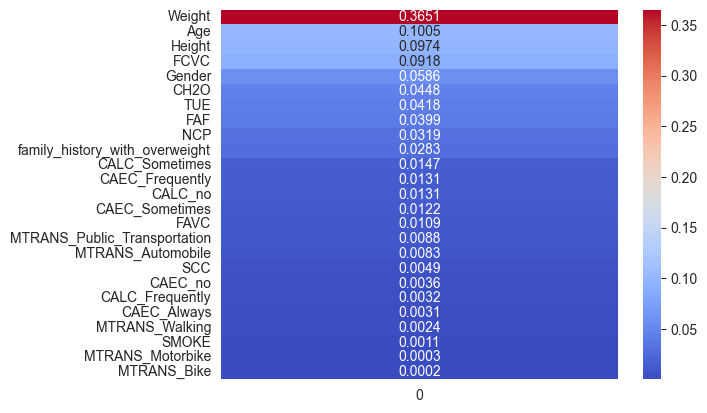

In [29]:
sns.heatmap(pd.DataFrame(feature_importance, index=train.drop("NObeyesdad", axis=1).columns).sort_values(by=0, ascending=False), cmap="coolwarm", annot=True, fmt=".4f")

In [30]:
X_train, X_val, y_train, y_val = train_test_split(train.drop("NObeyesdad", axis=1), train["NObeyesdad"], test_size=0.2, random_state=42)

In [31]:
train.to_csv("data/train_cleaned.csv", index=False)
test.to_csv("data/test_cleaned.csv", index=False)

In [32]:
np.save("data/X_train.npy", X_train)
np.save("data/X_val.npy", X_val)
np.save("data/y_train.npy", y_train)
np.save("data/y_val.npy", y_val)
np.save("data/test.npy", test.to_numpy())